**Text corpus creation and binary classification using DNN**

Import libraries

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Load the data

In [ ]:
df=pd.read_csv('text_pdl5.csv',encoding='cp1252')

In [ ]:
df.shape

(41, 2)

In [ ]:
df.columns

Index(['X', 'Y'], dtype='object')

Split data

In [ ]:
x=df["X"]

In [ ]:
y=df["Y"]

In [ ]:
x.head()

0    If you want to \achieve greatness stop asking ...
1    Success is walking from failure to failure wit...
2    Trust because you are willing to accept the ri...
3    Just when the caterpillar thought the world wa...
4    Whenever you see a successful person you only ...
Name: X, dtype: object

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64

In [ ]:
lemmatizer=WordNetLemmatizer()

Preprocessing

Stop words removal

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

## Remove stop words
stops = set(stopwords.words("english"))
text = [ps.stem(w) for w in df if not w in stops and len(w) >= 3]
text = list(set(df)) #remove duplicates
text = " ".join(df)

In [ ]:
def clean_review(review):

    tokens = review.lower().split()
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(filtered_tokens)

In [ ]:
import nltk
nltk.download('omw-1.4')
temp=x.tolist()
fax=[]
for i in temp:
    fax.append(clean_review(i))
n_X=pd.Series(fax)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Find unique word list and build a term  frequency matrix (you can use TF IDF features)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(n_X)
features_name = tfidf.get_feature_names()
text_vect = pd.DataFrame(vectors.todense(),columns=features_name)
text_vect

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,absolutely,accept,achieve,actually,again,alone,always,ant,...,whenever,willing,work,working,world,worst,wrong,yet,you,yourself
0,0.000000,0.000000,0.000000,0.000000,0.421858,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.421858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.379567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.373294,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.283653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.323526,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.582124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.395045,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
import tensorflow as tf

Dataset Preparation

using tf.Variable will aggregate the vectorized value

In [ ]:
temp = tf.Variable(text_vect)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(text_vect,y,train_size=0.75,test_size=0.25)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30, 218)
(30,)
(11, 218)
(11,)


Model Creation 

In [ ]:
from tensorflow.keras import Sequential
from keras.layers import Dense,Activation

Model with 5 hidden layer

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid')) #output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               28032     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 39,050
Trainable params: 39,050
Non-traina

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 2s - loss: 0.6901 - accuracy: 0.5417 - val_loss: 0.6944 - val_accuracy: 0.3333 - 2s/epoch - 866ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6783 - accuracy: 0.6667 - val_loss: 0.6935 - val_accuracy: 0.3333 - 40ms/epoch - 20ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6687 - accuracy: 0.6667 - val_loss: 0.6953 - val_accuracy: 0.3333 - 40ms/epoch - 20ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6578 - accuracy: 0.6667 - val_loss: 0.6981 - val_accuracy: 0.3333 - 39ms/epoch - 19ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6483 - accuracy: 0.6667 - val_loss: 0.7036 - val_accuracy: 0.3333 - 41ms/epoch - 20ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6335 - accuracy: 0.6667 - val_loss: 0.7102 - val_accuracy: 0.3333 - 50ms/epoch - 25ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6166 - accuracy: 0.6667 - val_loss: 0.7190 - val_accuracy: 0.3333 - 41ms/epoch - 20ms/step
Epoch 8/100
2/2 - 0s - loss: 0.5979 - accuracy: 0.6667 - val_loss: 0.7295 - val_accuracy: 0.3333 - 42ms/epoch - 21ms/step
Epoch 9/100
2/2 - 0s - lo

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 85ms/step - loss: 2.2000 - accuracy: 0.3636


[2.2000417709350586, 0.3636363744735718]

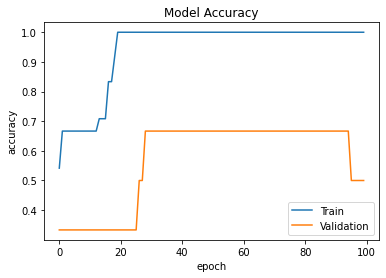

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

model with 3 hidden layer

In [ ]:
model2 = Sequential()
model2.add(Dense(512, activation='relu',input_dim=X_train.shape[1]))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(2, activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               112128    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 2)                 130       
                                                                 
Total params: 284,738
Trainable params: 284,738
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model2.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 1s - loss: 0.6880 - accuracy: 0.7083 - val_loss: 0.7098 - val_accuracy: 0.3333 - 615ms/epoch - 307ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6374 - accuracy: 0.6667 - val_loss: 0.7374 - val_accuracy: 0.3333 - 30ms/epoch - 15ms/step
Epoch 3/100
2/2 - 0s - loss: 0.5789 - accuracy: 0.6667 - val_loss: 0.7761 - val_accuracy: 0.3333 - 34ms/epoch - 17ms/step
Epoch 4/100
2/2 - 0s - loss: 0.5165 - accuracy: 0.6667 - val_loss: 0.8318 - val_accuracy: 0.3333 - 31ms/epoch - 15ms/step
Epoch 5/100
2/2 - 0s - loss: 0.4344 - accuracy: 0.7500 - val_loss: 0.8910 - val_accuracy: 0.3333 - 36ms/epoch - 18ms/step
Epoch 6/100
2/2 - 0s - loss: 0.3535 - accuracy: 0.8750 - val_loss: 0.9801 - val_accuracy: 0.3333 - 34ms/epoch - 17ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2748 - accuracy: 1.0000 - val_loss: 1.0873 - val_accuracy: 0.3333 - 30ms/epoch - 15ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2101 - accuracy: 1.0000 - val_loss: 1.1689 - val_accuracy: 0.3333 - 32ms/epoch - 16ms/step
Epoch 9/100
2/2 - 0s -

In [ ]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 23ms/step - loss: 1.4835 - accuracy: 0.2727


[1.4834818840026855, 0.27272728085517883]

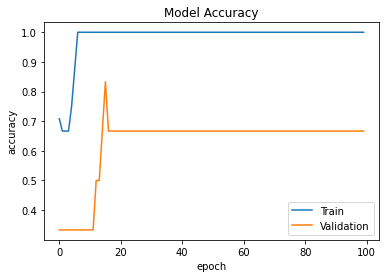

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Model with two hidden layer

In [ ]:
model3 = Sequential()
model3.add(Dense(1028, activation='relu',input_dim=X_train.shape[1]))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(2, activation='sigmoid')) #output layer
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1028)              225132    
                                                                 
 dense_16 (Dense)            (None, 512)               526848    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 2)                 514       
                                                                 
Total params: 883,822
Trainable params: 883,822
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model3.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 2s - loss: 0.6881 - accuracy: 0.5833 - val_loss: 0.7414 - val_accuracy: 0.3333 - 2s/epoch - 823ms/step
Epoch 2/100
2/2 - 0s - loss: 0.5861 - accuracy: 0.6667 - val_loss: 0.8015 - val_accuracy: 0.3333 - 64ms/epoch - 32ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4865 - accuracy: 0.6667 - val_loss: 0.8930 - val_accuracy: 0.3333 - 59ms/epoch - 30ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3695 - accuracy: 0.7917 - val_loss: 0.9841 - val_accuracy: 0.3333 - 64ms/epoch - 32ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2501 - accuracy: 1.0000 - val_loss: 1.0362 - val_accuracy: 0.3333 - 76ms/epoch - 38ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1509 - accuracy: 1.0000 - val_loss: 1.0973 - val_accuracy: 0.3333 - 59ms/epoch - 29ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0832 - accuracy: 1.0000 - val_loss: 1.1193 - val_accuracy: 0.3333 - 61ms/epoch - 31ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0420 - accuracy: 1.0000 - val_loss: 1.0498 - val_accuracy: 0.3333 - 65ms/epoch - 33ms/step
Epoch 9/100
2/2 - 0s - lo

In [ ]:
model3.evaluate(X_test,y_test)

1/1 [==============================] - 0s 58ms/step - loss: 2.2108 - accuracy: 0.5455


[2.210814952850342, 0.5454545617103577]

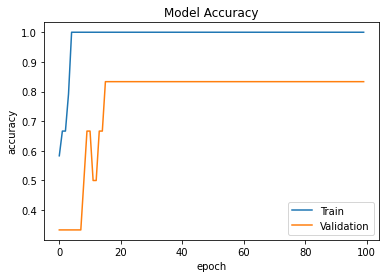

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Model with one hidden layer

In [ ]:
model4 = Sequential()
model4.add(Dense(64, activation='relu',input_dim=X_train.shape[1]))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(2, activation='sigmoid')) #output layer
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                14016     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 2)                 66        
                                                                 
Total params: 16,162
Trainable params: 16,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model4.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 1s - loss: 0.6854 - accuracy: 0.6250 - val_loss: 0.7106 - val_accuracy: 0.5000 - 1s/epoch - 690ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6684 - accuracy: 0.7500 - val_loss: 0.7167 - val_accuracy: 0.3333 - 47ms/epoch - 24ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6544 - accuracy: 0.7500 - val_loss: 0.7224 - val_accuracy: 0.3333 - 43ms/epoch - 21ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6413 - accuracy: 0.7500 - val_loss: 0.7282 - val_accuracy: 0.3333 - 67ms/epoch - 34ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6279 - accuracy: 0.7500 - val_loss: 0.7336 - val_accuracy: 0.3333 - 97ms/epoch - 49ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6144 - accuracy: 0.7917 - val_loss: 0.7393 - val_accuracy: 0.3333 - 79ms/epoch - 40ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6010 - accuracy: 0.7917 - val_loss: 0.7454 - val_accuracy: 0.3333 - 89ms/epoch - 44ms/step
Epoch 8/100
2/2 - 0s - loss: 0.5875 - accuracy: 0.7917 - val_loss: 0.7515 - val_accuracy: 0.3333 - 93ms/epoch - 46ms/step
Epoch 9/100
2/2 - 0s - lo

In [ ]:
model4.evaluate(X_test,y_test)

1/1 [==============================] - 0s 83ms/step - loss: 1.6615 - accuracy: 0.0909


[1.6615437269210815, 0.09090909361839294]

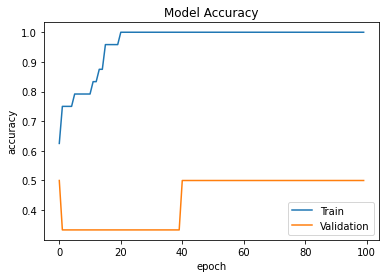

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()